In [1]:
import frontClasses as fc
import realClasses as rc

In [2]:
fits_path = '/Users/sashabawniedbalski/Desktop/FAST Data/FRB121102_tracking-M01_0010.fits'

fits_params = {'TUNIT13':'MHz',
               'OBSFREQ':1250,
               'OBSBW':500,
               'CHAN_BW':0.1220703125,
               'NCHAN':4096,
               'TUNIT1':'s',
               'NSBLK':1024,
               'NAXIS2':128,
               'TBIN':.000098304,
               'STDV_NOISE':1}

burst_params = {'TIME_UNIT':'s',
                'FREQ_UNIT':'MHz',
                'DM':500,
                'SNR':20,
                'MU_TIME':1,
                'MU_FREQ':1250,
                'SIG_TIME':10e-3,
                'SIG_FREQ':200}

In [3]:
bs = rc.FitsExtracted(path=fits_path)

/Users/sashabawniedbalski/opt/miniconda3/envs/frbpipe/lib/python3.11/site-packages/xarray/core/indexes.py:473: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  index = pd.Index(np.asarray(array), **kwargs)


In [4]:
ds = fc.SimulateSadTrombone(params=bs.params, dynamic_input=bs.data)

/Users/sashabawniedbalski/opt/miniconda3/envs/frbpipe/lib/python3.11/site-packages/xarray/core/indexes.py:473: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  index = pd.Index(np.asarray(array), **kwargs)


Inserting burst 1 of 2
{'TIME_UNIT': 'sec', 'FREQ_UNIT': 'MHz', 'DM': 506.0550673875987, 'SNR': 10.968474581646445, 'MU_TIME': 2.0737951944881714, 'MU_FREQ': 1050.0, 'SIG_TIME': 0.0006182998367581221, 'SIG_FREQ': 74.66210847468268}


In [6]:
ds.inject_frb(params=burst_params)

/Users/sashabawniedbalski/opt/miniconda3/envs/frbpipe/lib/python3.11/site-packages/xarray/core/indexes.py:473: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  index = pd.Index(np.asarray(array), **kwargs)


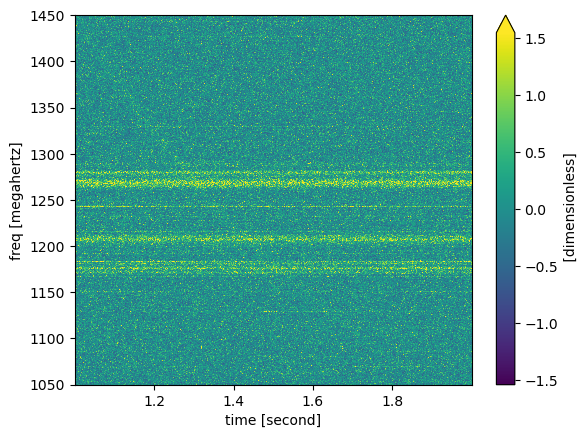

In [7]:
ds.dynamic_frame.sel(time=slice(1,2)).plot(x='time', vmin=-5*ds.STDV_NOISE, vmax=5*ds.STDV_NOISE)

In [8]:
ds.disperse(dm=-500)

/Users/sashabawniedbalski/opt/miniconda3/envs/frbpipe/lib/python3.11/site-packages/numpy/lib/stride_tricks.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, copy=False, subok=subok)
/Users/sashabawniedbalski/opt/miniconda3/envs/frbpipe/lib/python3.11/site-packages/xarray/core/variable.py:306: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


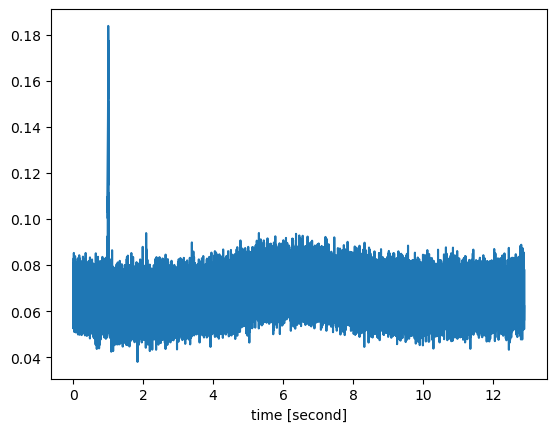

In [9]:
ds.dynamic_frame.mean(dim='freq').plot()

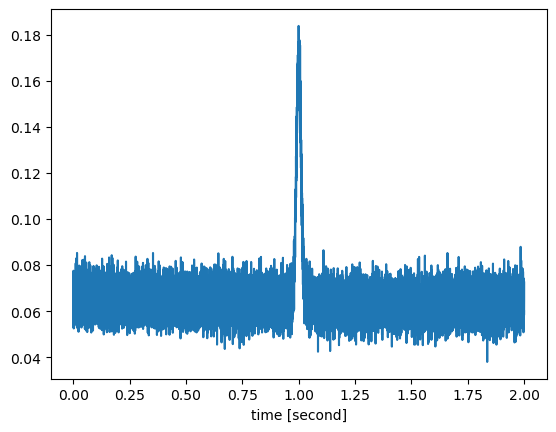

In [10]:
ds.dynamic_frame.sel(time=slice(0,2)).mean(dim='freq').plot()